# Gestión de datos

Objetivos

- Manejar valores omitidos
- Corregir el formato de los datos
- Estandarizar y normalizar datos
- Explorar rasgos o características para usar en un modelo


In [3]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Los datos no tienen encabezado por lo que debemos crearlos

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [6]:
df = pd.read_csv(file_path, names=headers) #creamos el Dataframe para trabajar con la url y los nombres de las columnas

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1. Identificar valores nulos u omitidos
### 1.1. Convertir «?» en NaN

Frecuentemente los datos que faltan vienen con el signo de interrogación «?». Deberemos sustituir los «?» por NaN (Not a Number), el marcador de valores perdidos por defecto de Python, por razones de velocidad de cálculo y comodidad.

In [8]:
# reemplaza "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### 1.2. Evaluación de los datos que faltan

<Axes: >

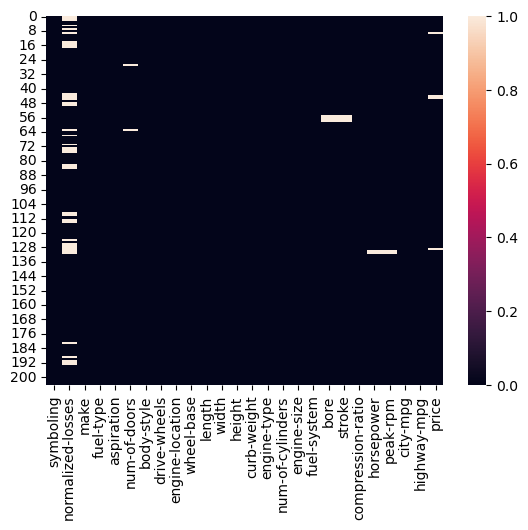

In [10]:
#Visualizamos los datos para ver de forma rápida las columnas con valores nulos
sns.heatmap(df.isnull())

In [11]:
#Utilizando un bucle for, podemos averiguar rápidamente el número de valores que faltan en cada columna, así como su proporción en la muestra. También vamos a mostrar los valores únicos, para saber qué valores tenemos
hay_nulos=False
for column in df.columns:
    if df[column].isnull().sum()>0:
        hay_nulos=True
        print(column)
        print(f'Nulos: ',df[column].isnull().sum())
        print(f'No Nulos: ',df[column].notnull().sum())
        print(f'% Nulos: ',round(df[column].isnull().sum()*100/len(df[column]),1),'%')
        print("")
    #en algunos casos al importar datasets los Null son importados como '?'. Hacemos la comprobación para que imprima el nombre de la columna si los contiene
    elif df[column].isin(['?']).sum()>0:
        hay_nulos=True
        print(f'La {column} contiene valores ?')
if not hay_nulos:
    print(f'El Dataset no tiene valores nulos')   



normalized-losses
Nulos:  41
No Nulos:  164
% Nulos:  20.0 %

num-of-doors
Nulos:  2
No Nulos:  203
% Nulos:  1.0 %

bore
Nulos:  4
No Nulos:  201
% Nulos:  2.0 %

stroke
Nulos:  4
No Nulos:  201
% Nulos:  2.0 %

horsepower
Nulos:  2
No Nulos:  203
% Nulos:  1.0 %

peak-rpm
Nulos:  2
No Nulos:  203
% Nulos:  1.0 %

price
Nulos:  4
No Nulos:  201
% Nulos:  2.0 %



In [12]:
df[['normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm']].describe(include='all')

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm
count,164,203,201,201,203,203
unique,51,2,38,36,59,23
top,161,four,3.62,3.40,68,5500
freq,11,114,23,20,19,37


### 1.3. ¿Cómo tratar los datos que faltan?
1. Elimine los datos
    - Elimine toda la fila
    - Eliminar toda la columna
2. Sustituir datos
    - Sustituir por la media
    - Sustitúyalo por frecuencia
    - Sustituirlo por otras funciones

Sólo se deben eliminar columnas enteras si la mayoría de las entradas de la columna están vacías. En el conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo. Tiene cierta libertad para elegir el método de sustitución de datos; sin embargo, algunos métodos pueden parecer más razonables que otros.

¿Qué valores usar para la sustitución?
1. Variable continua:
    - Media: Si la distribución es simétrica o no muy sesgada.
    - Mediana: Si la distribución es asimétrica o tiene outliers.
    - Moda: Usualmente no es relevante para variables continuas, salvo que sean discretas con pocos valores posibles.
2. Variable categórica:
    - Moda: Siempre es la mejor opción en este caso, ya que refleja la categoría más frecuente.

Distribución de los datos: Observa la forma de la distribución para tomar una decisión más informada (media o mediana).

Cantidad de valores nulos: Cuantos más valores nulos tengas, más cuidado debes tener en la elección del método de imputación.

Usa la media para variables numéricas continuas y simétricas, y la moda para variables categóricas.
Revisa la distribución de la variable antes de tomar una decisión. Si la distribución es sesgada o tiene outliers, considera usar la mediana o una imputación más avanzada.

- Reemplazar por media:
    - 'normalized-losses': 41 datos perdidos, sustituirlos por la media
    - 'stroke': 4 datos ausentes, sustituirlos por la media
    - 'bore': 4 datos faltantes, sustitúyalos por la media
    - 'horsepower': Faltan 2 datos, sustitúyalos por la media
    - 'peak-rpm': Faltan 2 datos, sustitúyalos por la media según el engine_location al que pertenezca.

- Reemplazar por frecuencia:

    - 'num-of-doors' Faltan 2 datos, sustitúyalos por «cuatro». Razón: El 84% de las berlinas son de cuatro puertas. Como cuatro puertas es lo más frecuente, es lo más probable que ocurra


- Eliminar toda la fila:
    - 'price': Faltan 4 datos, simplemente elimine toda la fila. Motivo: Quiere predecir el precio. No puede utilizar ninguna entrada de datos sin datos de precio para la predicción; por lo tanto, cualquier fila ahora sin datos de precio no le es útil.

### Sustituir datos
#### Reemplazamos por la media

In [13]:
# normalized-losses
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0) #Calculamos la media
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True) #Reemplazamos los valores nulos por la media calculada

#bore
avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

#stroke
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

#horsepower
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#### Reemplazamos por la media pero agrupando por otro atributo, peak_rpm en función de engine_location

In [14]:
df['peak-rpm']=df['peak-rpm'].astype(float)
def rpm_media(columnas):
    mean_rpm=round(df.groupby(['engine-location']).mean(numeric_only=True),0)
    mean_rpm=mean_rpm['peak-rpm']
    mean_rpm
    rpm=columnas[0]
    engine=columnas[1]
    if pd.isnull(rpm):
        if engine=='front':
            return mean_rpm['front']
        elif engine=='rear':
            return mean_rpm['rear']
       
    else:
        return rpm

In [15]:
df['peak-rpm']=df[['peak-rpm','engine-location']].apply(rpm_media,axis=1)

#### Reemplazar por frecuencia

In [16]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Puede verse que cuatro puertas es el tipo más común. También podemos utilizar el método «.idxmax()» para calcular automáticamente el tipo más común:

In [17]:
df["num-of-doors"].replace(np.nan, df['num-of-doors'].value_counts().idxmax(), inplace=True)

#### Eliminar las filas

In [18]:
df.dropna(subset=["price"], axis=0, inplace=True) #eliminamos las ilas en las que 'Price' es NaN
df.reset_index(drop=True, inplace=True) #reseteamos el índice ya que hemos eliminado dos filas

<Axes: >

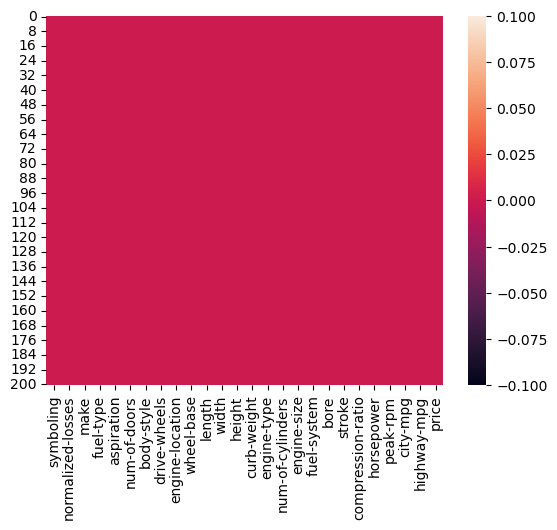

In [19]:
sns.heatmap(df.isnull())

Muy bien. Ahora tenemos un conjunto de datos sin valores perdidos.

## 2. Formato correcto de los datos

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### 2.1. Convertir el tipo de dato
Como se puede ver arriba, algunas columnas no tienen el tipo de datos correcto. Las variables numéricas deberían tener el tipo 'float' o 'int', y las variables con cadenas como las categorías deberían tener el tipo 'object'. Por ejemplo, los valores numéricos «diámetro» y «carrera» describen los motores, por lo que debería esperarse que fueran del tipo «float» o «int»; sin embargo, se muestran como tipo «objeto». Tienes que convertir los tipos de datos a un formato adecuado para cada columna utilizando el método «astype()».

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

¡Maravilloso! El conjunto de datos está depurado sin valores perdidos y con todos los datos en su formato correcto.


#### 2.2. Normalización de datos

La normalización es el proceso de transformar los datos en un formato común, lo que permite al investigador realizar una comparación significativa.

Ejemplo: En este conjunto de datos, las columnas de consumo de combustible «city-mpg» y «highway-mpg» están representadas por la unidad mpg (millas por galón). Suponga que está desarrollando una aplicación en un país que acepta el consumo de combustible con el estándar L/100km.

Tendrá que aplicar una transformación de datos para transformar mpg en L/100km.


In [22]:
df['city-mpg'] = 235/df["city-mpg"] #transformamos la columna con la fórmula: L/100km = 235 / mpg 
df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True) # renombramos la columna
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


#### 2.3 Normalización

La normalización es el proceso de transformar los valores de varias variables en un rango similar. Las normalizaciones típicas incluyen

- escalar la variable para que la media de la variable sea 0
- escalar la variable para que la varianza sea 1
- escalar la variable para que sus valores oscilen entre 0 y 1

Debes normalizar una columna cuando:

- Las columnas numéricas tienen diferentes escalas (rango de valores) o magnitudes muy dispares.
- Los datos tienen una distribución sesgada o con outliers.
- Estás utilizando un modelo sensible a la escala, como SVM, KNN, regresión logística, o redes neuronales.
- Observas alta correlación entre variables numéricas con diferentes escalas.
- Las distribuciones de los datos son comparativamente dispares, lo que podría influir en el comportamiento del modelo.

En este ejemplo, supongamos que desea escalar las columnas "length", "width" and "height".

Objetivo: normalizar esas variables para que su valor oscile entre 0 y 1

Método: sustituir el valor original por (valor original)/(valor máximo)

In [24]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

#### 2.4 Binning (Intervalos)

El binning es un proceso de transformación de variables numéricas continuas en «intervalos» categóricos discretos para el análisis agrupado.

Ejemplo:

En nuestro conjunto de datos, «horsepower» es una variable de valor real que oscila entre 48 y 288 y tiene 59 valores únicos. ¿Qué ocurre si sólo le interesa la diferencia de precio entre los coches con mucha potencia, potencia media y poca potencia (3 tipos)? Puedes reordenarlos en tres 'bins' para simplificar el análisis.

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <BarContainer object of 10 artists>)

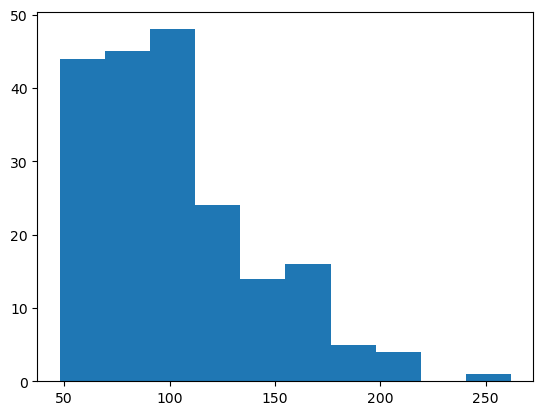

In [25]:
df["horsepower"]=df["horsepower"].astype(int, copy=True) #convertimos al tipo de dato correcto
plt.hist(df["horsepower"]) #dibujamos el histograma

Vasmos a repartir los datos en 3 intervalos de igual tamaño utilizando la función linspace(valor_inicial, valor_final, números_generados) de Numpy.

Puesto que deseamos incluir el valor mínimo de 'horsepower', establecemos el valor_inicial = min(df['horsepower']).

Dado que queremos incluir el valor máximo de 'horsepower', establecemos end_value = max(df['horsepower']).

Dado que vamos a crear 3 bins de igual longitud, necesitamos 4 divisores, por lo que numbers_generated = 4.

Construir una matriz bin con un valor mínimo a un valor máximo utilizando el ancho de banda calculado anteriormente. Los valores determinarán cuando termina un bin y comienza otro.

In [26]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [27]:
group_names = ['Low', 'Medium', 'High'] #ponemos nombre a los intervalos
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True ) #Aplicamos la función «cut» para determinar a qué pertenece cada valor de df['horsepower']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low


In [28]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

<BarContainer object of 3 artists>

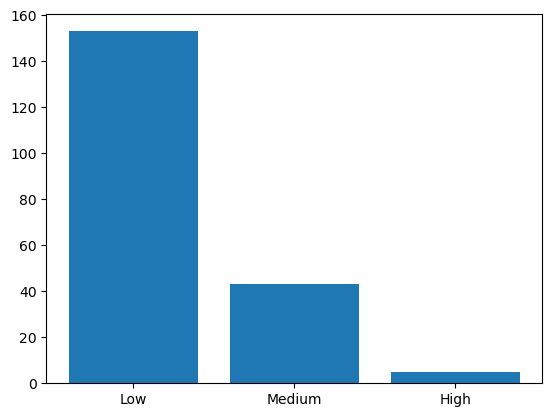

In [29]:
plt.bar(group_names, df['horsepower-binned'].value_counts())

#### 2.5. Variable indicadora
Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se denominan «ficticias» porque los números en sí no tienen un significado inherente.

Se utilizan variables indicadoras para poder utilizar variables categóricas para el análisis de regresión.

Ejemplo: La columna «fuel-type» tiene dos valores únicos: «gas» o “diesel”. La regresión no entiende de palabras, sólo de números. Para utilizar este atributo en el análisis de regresión, puedes convertir «fuel-type» en variables indicadoras.



In [30]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"],dtype=int) #Obtenga las variables indicadoras y asígnelas al marco de datos «dummy_variable_1»
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True) #renombramos las columnas para una mayor claridad
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [32]:
df = pd.concat([df, dummy_variable_1], axis=1) #añadimos el dataframe de las dummy_variables a nuestro dataframe
df.drop("fuel-type", axis = 1, inplace=True) #eliminamos la columna 'fuel type' que es la que hemos sustituido por los valores dummies

Hacemos lo mismo para 'aspiration'

In [33]:
dummy_variable_2 = pd.get_dummies(df['aspiration'],dtype=int)
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

In [34]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


## 3. Detección y manejo de outliers:

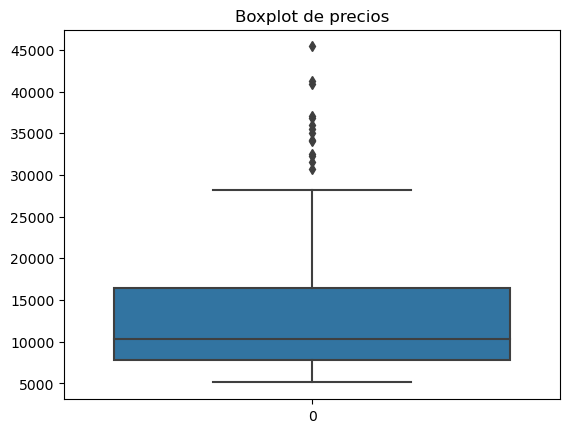

In [36]:
# Identificar outliers con un boxplot
sns.boxplot(df['price'])
plt.title('Boxplot de precios')
plt.show()